In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import copy
    
def read_libsvm(fname):
    with open(fname) as f:
        x,y  =list(),list()
        for l in f:
            line = l.strip().split(" ")
            y.append(int(line[0]))
            x.append([float(s.split(":")[1]) for s in line[1:]])
    return np.array(y),np.array(x);

def L1_loss(theta, X, y, pen):
    mse = ((y - X.dot(theta))**2).mean()
    return mse + pen * sum([np.abs(t) for t in theta])

def L2_loss(theta, X, y, pen):
    mse = ((y - X.dot(theta))**2).mean()
    return mse + pen * sum(theta**2)

def L1_2_loss(theta, X, y, pen1,pen2):
    mse = ((y - X.dot(theta))**2).mean()
    return mse +pen1 * sum([np.abs(t) for t in theta]) + pen2 * sum(theta**2)

data = read_libsvm('/Users/melkigabriel/Desktop/UPMC/AS/tp/breast-cancer_scale.txt')

x_train, x_test, y_train, y_test = train_test_split(data[1], data[0], test_size=0.33)

#Problème de label dans le dataset. Les labels 4 à 1 et le 2 à -1 
y_train = y_train -3 
y_test = y_test - 3

In [2]:
def L1_grad(x_train,y_train,coeff,theta_1,maxEpoch,learning_rate):
    
    theta = copy.deepcopy(theta_1)
    
    all_losses_global_train=np.zeros(maxEpoch)
    all_losses_global_test=np.zeros(maxEpoch)
    
    accuracy_train=np.zeros(maxEpoch)
    accuracy_test=np.zeros(maxEpoch)
    
    for iteration in range(0,maxEpoch) : 
        j=random.randint(0,len(x_train)-1)
        x=x_train[j]
        y=[y_train[j]]

        out = np.dot(x,theta) #valeur avec le modele remplacer par l'opération theta*x
        loss = L1_loss(theta,x,y,coeff)
        grad_theta = float(2*(out-y))*x + coeff*np.sign(np.transpose(theta))
        
        theta_prime = np.zeros((10,1))
        theta_prime = theta - learning_rate*np.transpose(grad_theta)

        for j in range(0,len(x)):
            theta[j] = (theta[j]*theta_prime[j]>=0)*theta_prime[j]

        all_losses_global_train[iteration] = L1_loss(theta,x_train,y_train,coeff)
        all_losses_global_test[iteration] = L1_loss(theta,x_test,y_test,coeff)

        for k in range(0,len(x_train)):
            accuracy_train[iteration] += ((np.sign(np.dot(x_train[k],theta))*[y_train[k]])+1)/2/len(x_train)

        for k in range(0,len(x_test)):
            accuracy_test[iteration] += ((np.sign(np.dot(x_test[k],theta))*[y_train[k]])+1)/2/len(x_test)
        
        
    return theta, all_losses_global_train, all_losses_global_test, accuracy_train, accuracy_test;

In [3]:
learning_rate=0.05
maxEpoch=500 

variance = 0.1
theta_test= np.random.uniform(-variance,variance,(10,1))

L1_0 = L1_grad(x_train,y_train,0,theta_test,maxEpoch,learning_rate) 

train = L1_0[3] #train_accuracy
test = L1_0[4] #test_accuracy

L'accuracy en train est de 97.29%
L'accuracy en test est de 59.14%


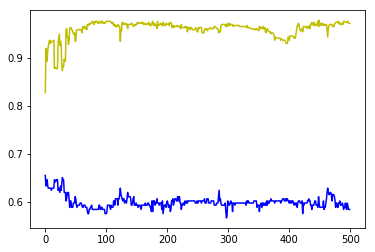

In [4]:
import matplotlib.pyplot as plt
plt.plot(train,'y')
#plt.figure()
plt.plot(test,'b')
print("L'accuracy en train est de " + str(round(float(train[len(train)-20:len(train)].mean())*100,2)) + "%")
print("L'accuracy en test est de " + str(round(float(test[len(test)-20:len(test)].mean())*100,2)) + "%")
plt.show()

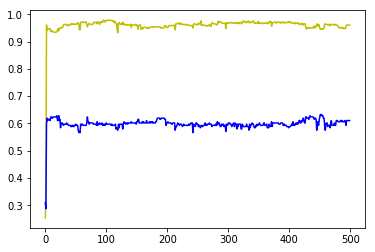

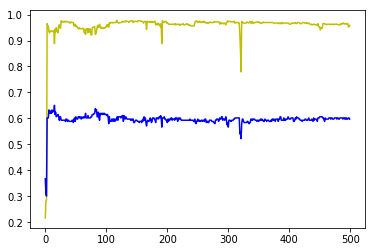

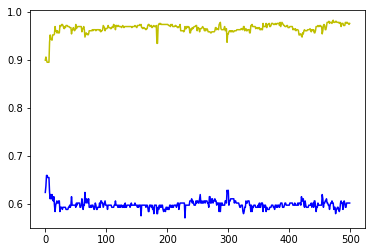

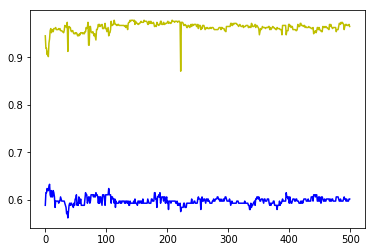

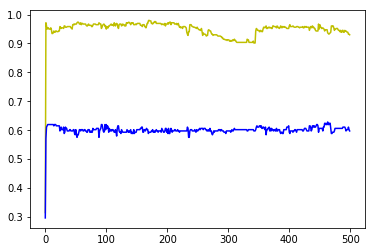

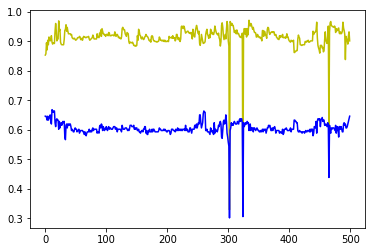

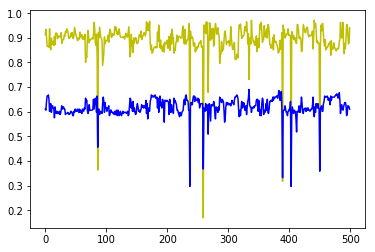

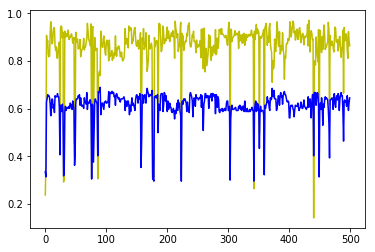

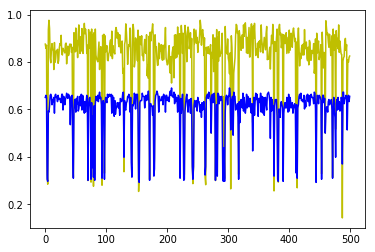

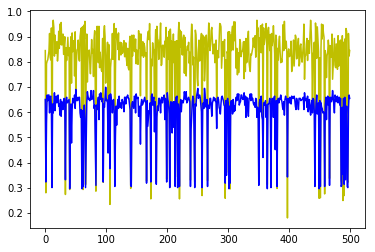

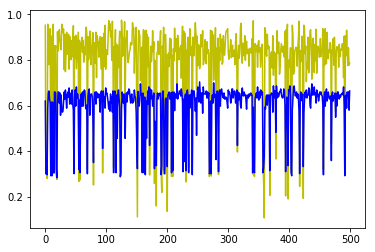

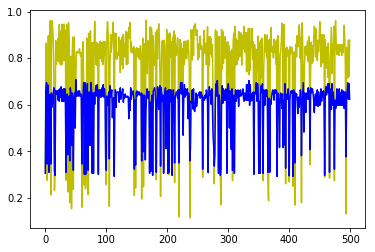

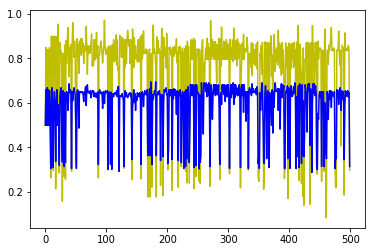

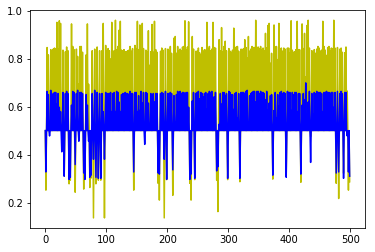

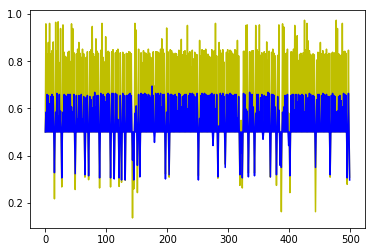

In [5]:

coeff = (0.001,0.005,0.01,0.05,0.1,0.5,1,1.2,1.5,1.7,2,3,4,5,10)
L1 = dict()
for k in coeff:
    theta_test= np.random.uniform(-variance,variance,(10,1))
    L1[k]= L1_grad(x_train,y_train,k,theta_test,maxEpoch,learning_rate)
    plt.figure()
    plt.plot(L1[k][3],'y')
    plt.plot(L1[k][4],'b')
plt.show()

In [6]:
error_list = []
accuracy_list = []
sparsity = []
for k in coeff:
    error_list.append(L1[k][2][maxEpoch-20:maxEpoch-1].mean())
    accuracy_list.append(L1[k][4][maxEpoch-20:maxEpoch-1].mean())
    sparsity.append(np.count_nonzero(L1[k][0]))

Le meilleur coeff pour l'accuracy est 1


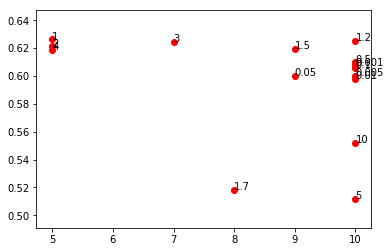

In [7]:
plt.scatter(sparsity,accuracy_list,color='r')

for i, txt in enumerate(coeff):
    plt.annotate(txt,(sparsity[i],accuracy_list[i]))
print("Le meilleur coeff pour l'accuracy est " + str(coeff[accuracy_list.index(max(accuracy_list))]))
plt.show()
#error_list

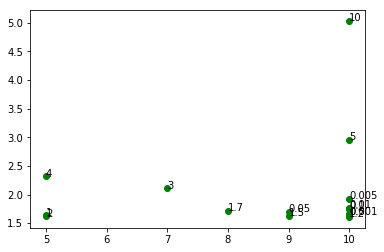

In [8]:
#Regardons le loss
plt.scatter(sparsity,error_list,color='g')

for i, txt in enumerate(coeff):
    plt.annotate(txt,(sparsity[i],error_list[i]))
plt.show()

In [9]:
def L2_grad(x_train,y_train,coeff,theta_1,maxEpoch,learning_rate):
    
    theta = copy.deepcopy(theta_1)
    
    all_losses_global_train=np.zeros(maxEpoch)
    all_losses_global_test=np.zeros(maxEpoch)
    
    accuracy_train=np.zeros(maxEpoch)
    accuracy_test=np.zeros(maxEpoch)
    
    for iteration in range(0,maxEpoch) : 
        j=random.randint(0,len(x_train)-1)
        x=x_train[j]
        y=[y_train[j]]

        out = np.dot(x,theta) #valeur avec le modele remplacer par l'opération theta*x
        loss = L2_loss(theta,x,y,coeff)
        grad_theta = float(2*(out-y))*x + coeff*2*np.transpose(theta)
        
        theta_prime = np.zeros((10,1))
        theta_prime = theta - learning_rate*np.transpose(grad_theta)

        for j in range(0,len(x)):
            theta[j] = (theta[j]*theta_prime[j]>=0)*theta_prime[j]

        all_losses_global_train[iteration] = L2_loss(theta,x_train,y_train,coeff)
        all_losses_global_test[iteration] = L2_loss(theta,x_test,y_test,coeff)

        for k in range(0,len(x_train)):
            accuracy_train[iteration] += ((np.sign(np.dot(x_train[k],theta))*[y_train[k]])+1)/2/len(x_train)

        for k in range(0,len(x_test)):
            accuracy_test[iteration] += ((np.sign(np.dot(x_test[k],theta))*[y_train[k]])+1)/2/len(x_test)
        
        
    return theta, all_losses_global_train, all_losses_global_test, accuracy_train, accuracy_test;

In [10]:
#L2
theta_test= np.random.uniform(-variance,variance,(10,1))
L2_0 = L2_grad(x_train,y_train,0,theta_test,maxEpoch,learning_rate) 

train = L2_0[3] #train_accuracy
test = L2_0[4] #test_accuracy

l'accuracy en train est de 96.85%
l'accuracy en est est de 59.85%


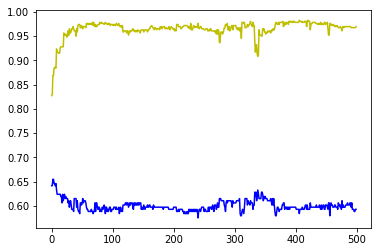

In [11]:
import matplotlib.pyplot as plt
plt.plot(train,'y')
plt.plot(test,'b')
print("l'accuracy en train est de " + str(round(float(train[len(train)-20:len(train)].mean())*100,2)) + "%")
print("l'accuracy en est est de " + str(round(float(test[len(test)-20:len(test)].mean())*100,2)) + "%")
plt.show()

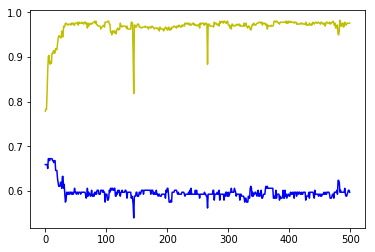

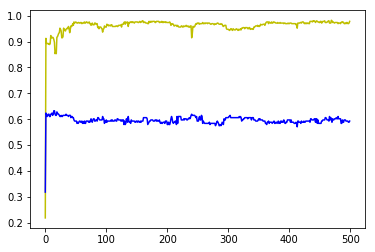

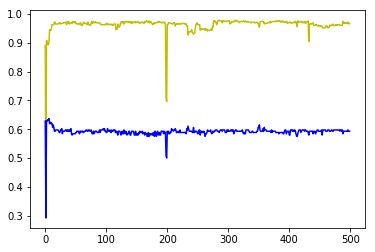

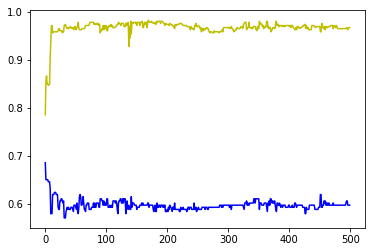

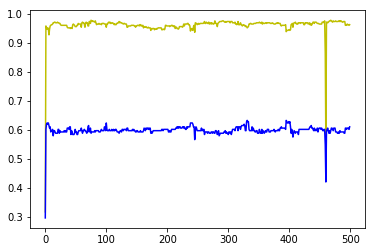

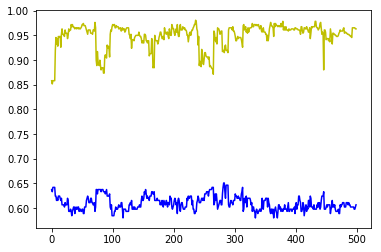

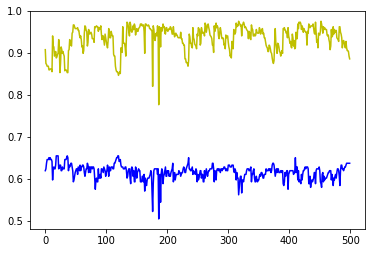

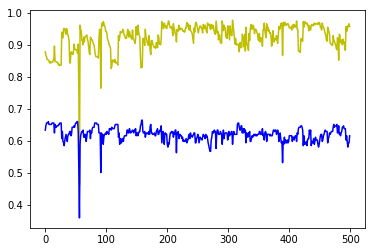

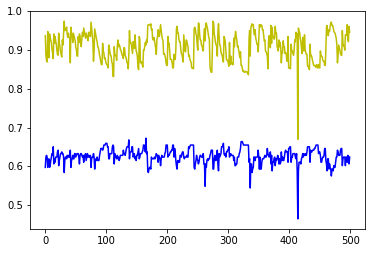

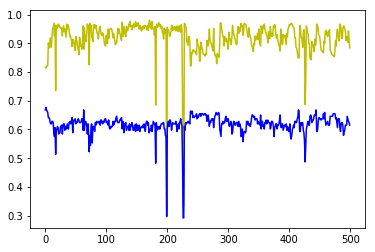

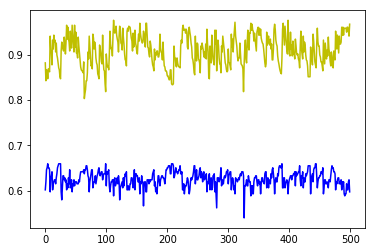

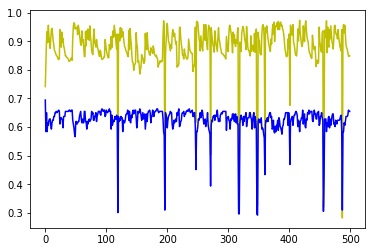

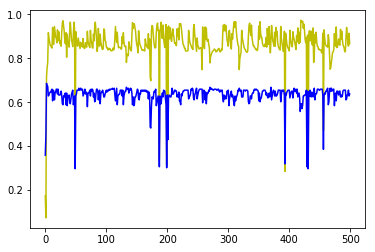

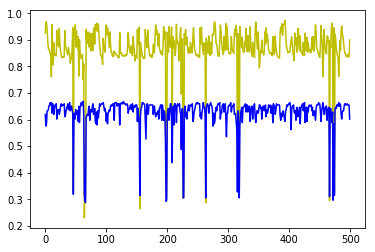

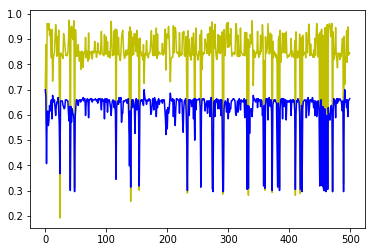

In [12]:
coeff = (0.001,0.005,0.01,0.05,0.1,0.5,1,1.2,1.5,1.7,2,3,4,5,10)
L2 = dict()
for k in coeff:
    theta_test= np.random.uniform(-variance,variance,(10,1))
    L2[k]= L2_grad(x_train,y_train,k,theta_test,maxEpoch,learning_rate) 
    plt.figure()
    plt.plot(L2[k][3],'y')
    plt.plot(L2[k][4],'b')
plt.show()

In [13]:
error_list = []
accuracy_list = []
sparsity = []
for k in coeff:
    error_list.append(L2[k][2][maxEpoch-20:maxEpoch-1].mean())
    accuracy_list.append(L2[k][4][maxEpoch-20:maxEpoch-1].mean())
    sparsity .append(np.count_nonzero(L2[k][0]))

Le meilleur coeff pour l'accuracy est 5


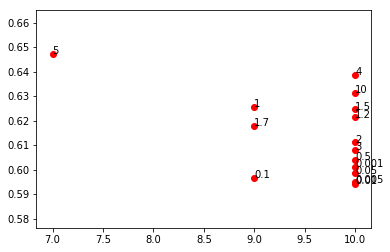

In [14]:
plt.scatter(sparsity,accuracy_list,color='r')

for i, txt in enumerate(coeff):
    plt.annotate(txt,(sparsity[i],accuracy_list[i]))
print("Le meilleur coeff pour l'accuracy est " + str(coeff[accuracy_list.index(max(accuracy_list))]))
plt.show()

In [15]:
def L1_2_grad(x_train,y_train,coeff_1,coeff_2,theta_1,maxEpoch,learning_rate):
    
    theta = copy.deepcopy(theta_1)
    
    all_losses_global_train=np.zeros(maxEpoch)
    all_losses_global_test=np.zeros(maxEpoch)
    
    accuracy_train=np.zeros(maxEpoch)
    accuracy_test=np.zeros(maxEpoch)
    
    for iteration in range(0,maxEpoch) : 
        j=random.randint(0,len(x_train)-1)
        x=x_train[j]
        y=[y_train[j]]

        out = np.dot(x,theta) #valeur avec le modele remplacer par l'opération theta*x
        loss = L1_2_loss(theta,x,y,coeff_1,coeff_2)
        grad_theta = float(2*(out-y))*x +coeff_1*np.sign(np.transpose(theta)) +coeff_2*2*np.transpose(theta)
        
        theta_prime = np.zeros((10,1))
        theta_prime = theta - learning_rate*np.transpose(grad_theta)

        for j in range(0,len(x)):
            theta[j] = (theta[j]*theta_prime[j]>=0)*theta_prime[j]

        all_losses_global_train[iteration] = L1_2_loss(theta,x_train,y_train,coeff_1,coeff_2)
        all_losses_global_test[iteration] = L1_2_loss(theta,x_test,y_test,coeff_1,coeff_2)

        for k in range(0,len(x_train)):
            accuracy_train[iteration] += ((np.sign(np.dot(x_train[k],theta))*[y_train[k]])+1)/2/len(x_train)

        for k in range(0,len(x_test)):
            accuracy_test[iteration] += ((np.sign(np.dot(x_test[k],theta))*[y_train[k]])+1)/2/len(x_test)
        
        
    return theta, all_losses_global_train, all_losses_global_test, accuracy_train, accuracy_test;

In [16]:
theta_test= np.random.uniform(-variance,variance,(10,1))

L1_2_0 = L1_2_grad(x_train,y_train,0,0,theta_test,maxEpoch,learning_rate) 

train = L1_2_0[3] #train_accuracy
test = L1_2_0[4] #test_accuracy

l'accuracy en train est de 96.93%
l'accuracy en est est de 59.29%


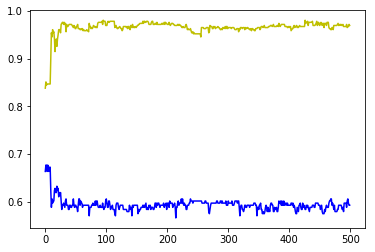

In [17]:
import matplotlib.pyplot as plt
plt.plot(train,'y')
plt.plot(test,'b')
print("l'accuracy en train est de " + str(round(float(train[len(train)-20:len(train)].mean())*100,2)) + "%")
print("l'accuracy en est est de " + str(round(float(test[len(test)-20:len(test)].mean())*100,2)) + "%")
plt.show()

In [29]:
coeff_1 = (0.001,0.005,0.01,0.05,0.1,0.5,1,1.2,1.5,1.7,2,3,4,5,10)
coeff_2 = (0.001,0.005,0.01,0.05,0.1,0.5,1,1.2,1.5,1.7,2,3,4,5,10)

L1_2 = dict()
for k in coeff_1:
    for l in coeff_2:
        theta_test= np.random.uniform(-variance,variance,(10,1))
        L1_2[(k,l)]= L1_2_grad(x_train,y_train,k,l,theta_test,maxEpoch,learning_rate) 

In [30]:
error_list = []
accuracy_list = []
sparsity = []
for k in coeff:
    for l in coeff_2:
        error_list.append(L1_2[(k,l)][2][maxEpoch-20:maxEpoch-1].mean())
        accuracy_list.append(L1_2[(k,l)][4][maxEpoch-20:maxEpoch-1].mean())
        sparsity .append(np.count_nonzero(L1_2[(k,l)][0]))

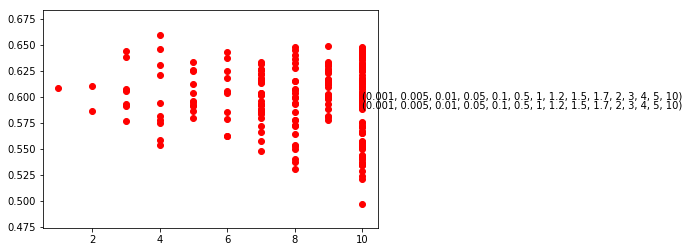

87

In [34]:
plt.scatter(sparsity,accuracy_list,color='r')

for i, txt in enumerate((coeff_1,coeff_2)):
    plt.annotate(txt,(sparsity[i],accuracy_list[i]))
plt.show()
accuracy_list.index(max(accuracy_list))

In [35]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

accuracy_train=0
for k in range(0,len(x_train)):
    accuracy_train += ((np.sign(lasso.predict(x_train[k].reshape(1,10)))*[y_train[k]])+1)/2/len(x_train)

accuracy_test=0
for k in range(0,len(x_test)):
    accuracy_test += ((np.sign(lasso.predict(x_test[k].reshape(1,10)))*[y_train[k]])+1)/2/len(x_test)


In [36]:
print("L'accuracy en train est de " + str(round(float(accuracy_train)*100,2))+"%")
print("L'accuracy en est est de " + str(round(float(accuracy_test)*100,2)) + "%")

L'accuracy en train est de 96.5%
L'accuracy en est est de 60.18%
